In [2]:
from empymod.scripts import fdesign

In [10]:
from scipy.special import ellipk, ellipe
from scipy import pi

In [11]:
ellipk(1)

inf

In [12]:
ellipe(1)

1.0

In [23]:
import numpy as np

@np.vectorize
def analytic_hz(r):
    ksq = 1 - ((r-1)/(r+1))**2
    return ((r-1)*ellipk(ksq) - (r+1)*ellipe(ksq))/(2*pi*(r+1)*(r-1))


In [24]:
import matplotlib.pyplot as plt

In [25]:
import numpy as np
rgrid = np.arange(0,2.0,0.02)

/tmp/ipykernel_21972/3797862185.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return ((r-1)*ellipk(ksq) - (r+1)*ellipe(ksq))/(2*pi*(r+1)*(r-1))


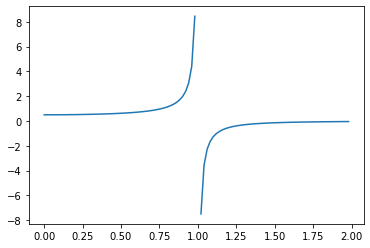

In [26]:
plt.plot(rgrid, analytic_hz(rgrid))

In [27]:
analytic_hz(rgrid)

/tmp/ipykernel_21972/3797862185.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return ((r-1)*ellipk(ksq) - (r+1)*ellipe(ksq))/(2*pi*(r+1)*(r-1))


array([ 0.5       ,  0.50015006,  0.5006009 ,  0.50135457,  0.50241449,
        0.5037855 ,  0.50547394,  0.50748768,  0.50983628,  0.51253106,
        0.51558527,  0.51901425,  0.52283565,  0.52706967,  0.53173939,
        0.53687106,  0.54249457,  0.54864392,  0.55535781,  0.56268038,
        0.57066203,  0.57936045,  0.58884191,  0.59918277,  0.61047135,
        0.62281031,  0.63631952,  0.65113981,  0.66743755,  0.68541076,
        0.70529682,  0.72738275,  0.75201886,  0.77963714,  0.81077653,
        0.84611832,  0.88653645,  0.93317111,  0.9875388 ,  1.05170213,
        1.12854113,  1.22220438,  1.33889732,  1.48834318,  1.6866995 ,
        1.96296187,  2.37494138,  3.05709828,  4.41146022,  8.44077647,
               nan, -7.48703445, -3.56762246, -2.27719139, -1.64006094,
       -1.26269702, -1.01442842, -0.83946879, -0.7100335 , -0.61074769,
       -0.53242366, -0.46923876, -0.41732756, -0.37402549, -0.33743764,
       -0.30618065, -0.27922174, -0.25577482, -0.23523142, -0.21

In [48]:
from scipy.special import jv

def j0_loop_pair():
    def lhs(l):
        return l/2*jv(1,l)

    def rhs(r):
        ksq = 1 - ((r-1)/(r+1))**2
        return ((r-1)*ellipk(ksq) - (r+1)*ellipe(ksq))/(2*pi*(r+1)*(r-1))

    return fdesign.Ghosh('j0', lhs, rhs)
        

In [49]:
j0_loop_pair()

In [50]:
inp = {
    'r': np.arange(0.01,2.0,0.02),
    'n': 201,
    'fI': j0_loop_pair(),
    'full_output' : True
}

In [51]:
filt1, out1 = fdesign.design(spacing=(0.01,0.2,10), shift=(-4,0,10), save=False, **inp)

* WARNING :: `matplotlib` is not installed, no figures shown.
   brute fct calls : 99/100
   Filter length   : 201
   Best filter
   > Min field     : inf
   > Spacing       : 0.01
   > Shift         : -4
   > Base min/max  : 6.737947e-03 / 4.978707e-02

:: empymod END; runtime = 0:00:05.360932 :: 

